In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [131]:
# data
df = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")
#print(df)



In [132]:
mutant = df.mutant
DMS = df.DMS_score
DMS_bin=df.DMS_score_bin

In [133]:
# weitere Zeile mit 'position'
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)
print(df)
          

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
5        M1K  KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.636700   
6        D2N  MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.682954   
7        D2A  MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.180782   
8        D2E  MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.088696   
9        D2H  MHLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.473831   
10       D2Y  MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.256095   
11       D2V  MVLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [134]:
#Zeile mit neuer Aminosäure
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
5        M1K  KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.636700   
6        D2N  MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.682954   
7        D2A  MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.180782   
8        D2E  MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.088696   
9        D2H  MHLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.473831   
10       D2Y  MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.256095   
11       D2V  MVLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

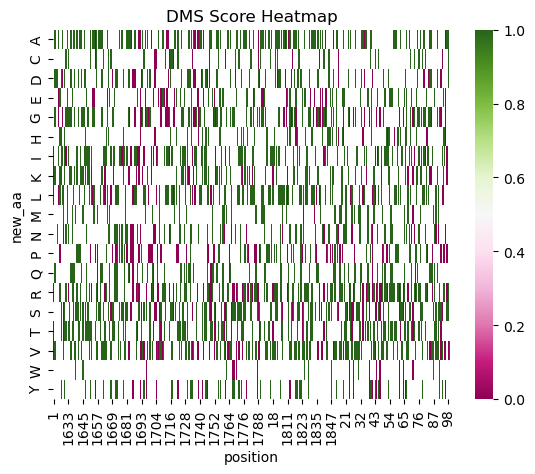

In [135]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values notinfinal
pivot_table = df.pivot_table(index='new_aa', columns='position', values='DMS_score_bin', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='PiYG')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Heatmap')
plt.show()

In [136]:
# höchster DMS_score, bei dem bin score = 0 notinfinal
bin_filter= df['DMS_score_bin'] == 0
filtered_df = df[bin_filter]

max_DMS = filtered_df['DMS_score'].max()
print(max_DMS)

-1.009539446


In [137]:
df_filtered = df[df['DMS_score_bin'] == 0]

In [138]:
# checking secondary structure for helices -> Werte aus Psipred ->  in df nur noch Mutation bei Helices

helices = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]

helices_df = df.loc[df['position'].astype(str).isin(helices)]
print(helices_df)







      mutant                                   mutated_sequence  DMS_score  \
41       V8G  MDLSALRGEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.312289   
42       V8F  MDLSALRFEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.569227   
43       V8D  MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.121676   
44       V8A  MDLSALRAEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.223406   
45       V8I  MDLSALRIEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.560919   
46       V8L  MDLSALRLEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.448267   
47       E9G  MDLSALRVGEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.145408   
48       E9D  MDLSALRVDEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.129704   
49       E9Q  MDLSALRVQEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.292376   
50       E9V  MDLSALRVVEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.252638   
51       E9A  MDLSALRVAEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.236743   
52       E9K  MDLSALRVKEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [139]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Helices (bin=0)
helices_df_bin0 = helices_df.loc[helices_df['DMS_score_bin'] == 0].copy()
helices_df_bin0

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,new_aa
43,V8D,MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.121676,0,8,D
59,V11L,MDLSALRVEELQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.168017,0,11,L
60,V11G,MDLSALRVEEGQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.474497,0,11,G
61,V11E,MDLSALRVEEEQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.204883,0,11,E
68,Q12P,MDLSALRVEEVPNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.184755,0,12,P
78,V14D,MDLSALRVEEVQNDINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.233905,0,14,D
81,V14G,MDLSALRVEEVQNGINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.861215,0,14,G
82,V14F,MDLSALRVEEVQNFINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.431762,0,14,NaN
84,I15T,MDLSALRVEEVQNVTNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.096973,0,15,T
85,I15F,MDLSALRVEEVQNVFNAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.320409,0,15,NaN


In [140]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strand

strands = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]


strands_df = df.loc[df['position'].astype(str).isin(strands)]
print(strands_df)

      mutant                                   mutated_sequence  DMS_score  \
683   M1650R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.292724   
684   M1650L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.117123   
685   M1650K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.081677   
686   M1650I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.093431   
687   M1650T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.210381   
688   M1650V  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.758385   
689   S1651A  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.343580   
690   S1651C  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.293666   
691   S1651F  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.631797   
692   S1651P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.478649   
693   S1651T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.284495   
694   S1651Y  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [141]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strands (bin=0)
strands_df_bin0 = strands_df.loc[strands_df['DMS_score_bin'] == 0].copy()
print(strands_df_bin0)


      mutant                                   mutated_sequence  DMS_score  \
692   S1651P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.478649   
695   M1652R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.890501   
700   M1652K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.532355   
702   V1653E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.503698   
704   V1653L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.797284   
709   V1654E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.067964   
832   T1677I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.013695   
870   T1684N  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.250974   
872   T1684S  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.305009   
873   T1684P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.468392   
874   T1684I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.973015   
875   T1685N  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [142]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei coils 
df['position'] = df['position'].astype(int)

coils = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) + list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865))
coils_df = df.loc[df['position'].isin(coils)]
print(coils_df)




      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
5        M1K  KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.636700   
6        D2N  MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.682954   
7        D2A  MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.180782   
8        D2E  MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.088696   
9        D2H  MHLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.473831   
10       D2Y  MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.256095   
11       D2V  MVLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [143]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Coils  (bin=0)
coils_df_bin0 = coils_df.loc[coils_df['DMS_score_bin'] == 0].copy()
coils_df_bin0

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,new_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,I
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,V
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,T
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,R
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,L
5,M1K,KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.636700,0,1,K
9,D2H,MHLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.473831,0,2,H
11,D2V,MVLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.159498,0,2,V
12,D2G,MGLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.017828,0,2,G
128,L22S,MDLSALRVEEVQNVINAMQKISECPICLELIKEPVSTKCDHIFCKF...,-2.106676,0,22,S


In [144]:
# Test, ob ich dumm bin und sich Helices/Strands/Coils überschneiden. FAzIT: NEIN
set1 = set(helices)
set2 = set(strands)
set3 = set(coils)

common_elements = set1.intersection(set2, set3)

common_elements_list = list(common_elements)
common_elements_list

[]

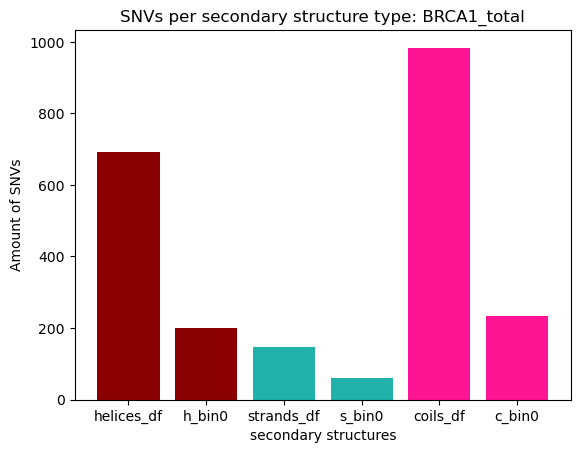

Verhältnis h_bin0 zu helices: 29.00%
Verhältnis strands_bin0 zu strands: 40.54%
Verhältnis coils_bin0 zu coils: 23.88%


In [145]:
#plot Vergleich secondary structures


# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df),len(helices_df_bin0), len(strands_df),len(strands_df_bin0), len(coils_df),len(coils_df_bin0)]

# DataFrame-Namen
df_names = ['helices_df',"h_bin0", 'strands_df',"s_bin0",'coils_df',"c_bin0"]
colors = ['darkred', 'darkred', 'lightseagreen', 'lightseagreen', 'deeppink', 'deeppink']

# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)



# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: BRCA1_total')

# Zeige das Diagramm an
plt.show()


#Verältnisse der Sekundärstrukturen und ihren bin0 scores

# Liste der DataFrames
dataframes = [helices_df, helices_df_bin0, strands_df, strands_df_bin0, coils_df, coils_df_bin0]

# DataFrame-Namen
df_names = ['helices', 'h_bin0', 'strands', 'strands_bin0', 'coils', 'coils_bin0']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")

In [31]:
len_hBRCA = len(helices_df)
len_hBRCA0 = len(helices_df_bin0)
len_sBRCA = len(strands_df)
len_sBRCA0 = len(strands_df_bin0)
len_cBRCA = len(coils_df)
len_cBRCA0 = len(coils_df_bin0)


import numpy as np
observed_data_BRCA = np.array([[len_hBRCA, len_sBRCA, len_cBRCA],[len_hBRCA0, len_sBRCA0, len_cBRCA0]])

#H0: no correlation
#Chi2-test
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed_data_BRCA)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 10.752678121695594
P-value: 0.004624721801528325
Degrees of freedom: 2
Expected counts:
[[702.95131409 163.55019388 958.49849203]
 [191.04868591  44.44980612 260.50150797]]


In [34]:
observed_data_BRCA

array([[693, 148, 984],
       [201,  60, 235]])

In [35]:
#Does the order of the np.array make a difference?

len_hBRCA = len(helices_df)
len_hBRCA0 = len(helices_df_bin0)
len_sBRCA = len(strands_df)
len_sBRCA0 = len(strands_df_bin0)
len_cBRCA = len(coils_df)
len_cBRCA0 = len(coils_df_bin0)


import numpy as np
observed_data_BRCA_test = np.array([[len_hBRCA0, len_sBRCA0, len_cBRCA0], [len_hBRCA, len_sBRCA, len_cBRCA]])

#H0: no correlation
#Chi2-test
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed_data_BRCA_test)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)

Chi-square statistic: 10.752678121695592
P-value: 0.004624721801528327
Degrees of freedom: 2
Expected counts:
[[191.04868591  44.44980612 260.50150797]
 [702.95131409 163.55019388 958.49849203]]


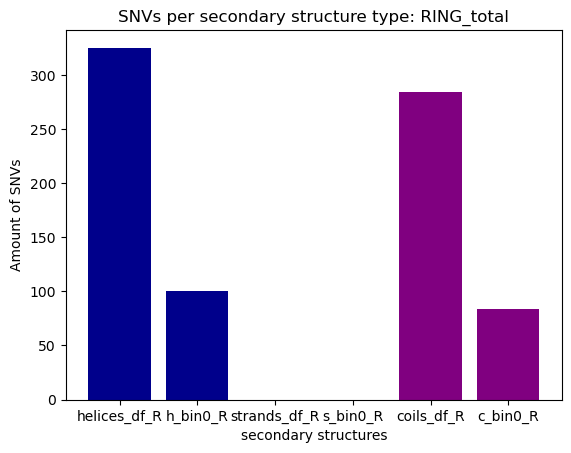

Verhältnis h_bin0_R zu helices_R: 30.77%
Verhältnis coils_bin0_R zu coils_R: 29.58%


In [146]:
#nochmal alles (secondary structures), aber nur RING-Domäne (AS 1-101)

#Helices in RING
helices_RING = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97"]
helices_df_RING = df.loc[df['position'].astype(str).isin(helices_RING)]
helices_df_RING_bin0 = helices_df_RING.loc[helices_df_RING['DMS_score_bin'] == 0].copy()

#strands in RING (gibts nicht)
#coils in RING
df['position'] = df['position'].astype(int)
coils_RING = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) 
coils_df_RING = df.loc[df['position'].isin(coils_RING)]
coils_df_RING_bin0 = coils_df_RING.loc[coils_df_RING['DMS_score_bin'] == 0].copy()

#Plot mit RING
# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df_RING),len(helices_df_RING_bin0),0,0, len(coils_df_RING),len(coils_df_RING_bin0)]
# DataFrame-Namen
df_names = ['helices_df_R',"h_bin0_R", 'strands_df_R',"s_bin0_R",'coils_df_R',"c_bin0_R"]
colors = ['darkblue', 'darkblue', 'red', 'red', 'purple', 'purple']
# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)
# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: RING_total')
plt.show()



#Verältnisse der Sekundärstrukturen und ihren bin0 scores (RING)

# Liste der DataFrames
dataframes = [helices_df_RING, helices_df_RING_bin0, coils_df_RING, coils_df_RING_bin0]

# DataFrame-Namen
df_names = ['helices_R', 'h_bin0_R', 'coils_R', 'coils_bin0_R']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")



BRCT = df[575:]




In [147]:
len_hRING=len(helices_df_RING)
len_hRING0=len(helices_df_RING_bin0)
len_cRING=len(coils_df_RING)
len_cRING0=len(coils_df_RING_bin0)


In [148]:
# expected data (which we didn´t even need)
import numpy as np
from scipy.stats.contingency import expected_freq
observed_data_RING = np.array([[len_cRING, len_hRING],[len_cRING0, len_hRING0]])
expected_data_RING = expected_freq(observed_data_RING)
print (expected_data_RING)



[[282.61286255 326.38713745]
 [ 85.38713745  98.61286255]]


In [149]:
print (observed_data_RING)

[[284 325]
 [ 84 100]]


In [150]:
#H0: no correlation
#Chi2-test
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed_data_RING)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)


Chi-square statistic: 0.022393889272595308
P-value: 0.8810440090537792
Degrees of freedom: 1
Expected counts:
[[282.61286255 326.38713745]
 [ 85.38713745  98.61286255]]


In [151]:
#RING df mit weiteren column "secondary structures"

helices_RING = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97"]
helices_df_RING = df.loc[df['position'].astype(str).isin(helices_RING)]
helices_df_RING_bin0 = helices_df_RING.loc[helices_df_RING['DMS_score_bin'] == 0].copy()


RING = df[:575]
new_RING = RING.copy()
new_RING['secondary structures'] = RING['position'].apply(lambda x: 'H' if str(x) in helices_RING else 'C')


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(new_RING)

    mutant                                   mutated_sequence  DMS_score  \
0      M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1      M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2      M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3      M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4      M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
5      M1K  KDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.636700   
6      D2N  MNLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.682954   
7      D2A  MALSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.180782   
8      D2E  MELSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.088696   
9      D2H  MHLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.473831   
10     D2Y  MYLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.256095   
11     D2V  MVLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.159498   
12     D2G  

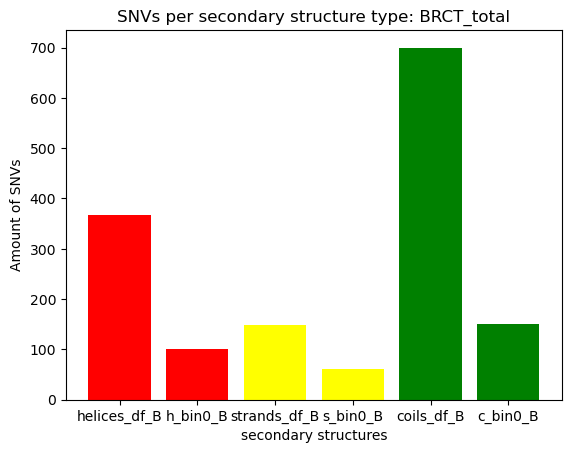

Verhältnis h_bin0_B zu helices_B: 27.45%
Verhältnis s_bin0_B zu strands_B: 40.54%
Verhältnis coils_bin0_B zu coils_B: 21.57%


In [152]:
#nochmal alles (secondary structures), aber nur BRCT-Domäne (AS 1631-ENDE)

#Helices in BRCT
helices_BRCT = ["1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df_BRCT = df.loc[df['position'].astype(str).isin(helices_BRCT)]
helices_df_BRCT_bin0 = helices_df_BRCT.loc[helices_df_BRCT['DMS_score_bin'] == 0].copy()
#strands in BRCT
strands_BRCT = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df_BRCT = df.loc[df['position'].astype(str).isin(strands_BRCT)]
strands_df_BRCT_bin0 = strands_df_BRCT.loc[strands_df_BRCT['DMS_score_bin'] == 0].copy()

#coils in BRCT
df['position'] = df['position'].astype(int)
coils_BRCT = list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865)) 
coils_df_BRCT = df.loc[df['position'].isin(coils_BRCT)]
coils_df_BRCT_bin0 = coils_df_BRCT.loc[coils_df_BRCT['DMS_score_bin'] == 0].copy()

#Plot mit BRCT
# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df_BRCT),len(helices_df_BRCT_bin0),len(strands_df_BRCT),len(strands_df_BRCT_bin0), len(coils_df_BRCT),len(coils_df_BRCT_bin0)]
# DataFrame-Namen
df_names = ['helices_df_B',"h_bin0_B", 'strands_df_B',"s_bin0_B",'coils_df_B',"c_bin0_B"]
colors = ['red', 'red', 'yellow', 'yellow', 'green', 'green']
# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)
# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('secondary structures')
plt.ylabel('Amount of SNVs')
plt.title('SNVs per secondary structure type: BRCT_total')
plt.show()



#Verältnisse der Sekundärstrukturen und ihren bin0 scores (BRCT)

# Liste der DataFrames
dataframes = [helices_df_BRCT, helices_df_BRCT_bin0, strands_df_BRCT,strands_df_BRCT_bin0,coils_df_BRCT, coils_df_BRCT_bin0]

# DataFrame-Namen
df_names = ['helices_B', 'h_bin0_B',"strands_B","s_bin0_B", 'coils_B', 'coils_bin0_B']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")


In [168]:
len_hBRCT=len(helices_df_BRCT)
len_hBRCT0=len(helices_df_BRCT_bin0)
len_cBRCT=len(coils_df_BRCT)
len_cBRCT0=len(coils_df_BRCT_bin0)
len_sBRCT=len(strands_df_BRCT)
len_sBRCT0=len(strands_df_BRCT_bin0)



# expected data (which we didn´t even need)
import numpy as np
from scipy.stats.contingency import expected_freq
observed_data_BRCT = np.array([[len_cBRCT, len_hRING, len_sBRCT],[len_cBRCT0, len_hBRCT0, len_sBRCT0]])
expected_data_BRCT = expected_freq(observed_data_BRCT)

#H0: no correlation
#Chi2-test
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed_data_BRCT)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected counts:")
print(expected)


Chi-square statistic: 15.036107804784002
P-value: 0.0005431886360097251
Degrees of freedom: 2
Expected counts:
[[672.2040404 336.4969697 164.2989899]
 [178.7959596  89.5030303  43.7010101]]


In [ ]:
#BRCT df mit weiteren column "secondary stuctures"

#Helices in BRCT
helices_BRCT = ["1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df_BRCT = df.loc[df['position'].astype(str).isin(helices_BRCT)]
helices_df_BRCT_bin0 = helices_df_BRCT.loc[helices_df_BRCT['DMS_score_bin'] == 0].copy()
#strands in BRCT
strands_BRCT = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df_BRCT = df.loc[df['position'].astype(str).isin(strands_BRCT)]
strands_df_BRCT_bin0 = strands_df_BRCT.loc[strands_df_BRCT['DMS_score_bin'] == 0].copy()

BRCT = df[575:]
new_BRCT = BRCT.copy()
new_BRCT['secondary structures'] = BRCT['position'].apply(lambda x: 'H' if str(x) in helices_BRCT else ('S' if str(x) in strands_BRCT else 'C'))
new_BRCT

In [ ]:
new_RING
new_BRCT

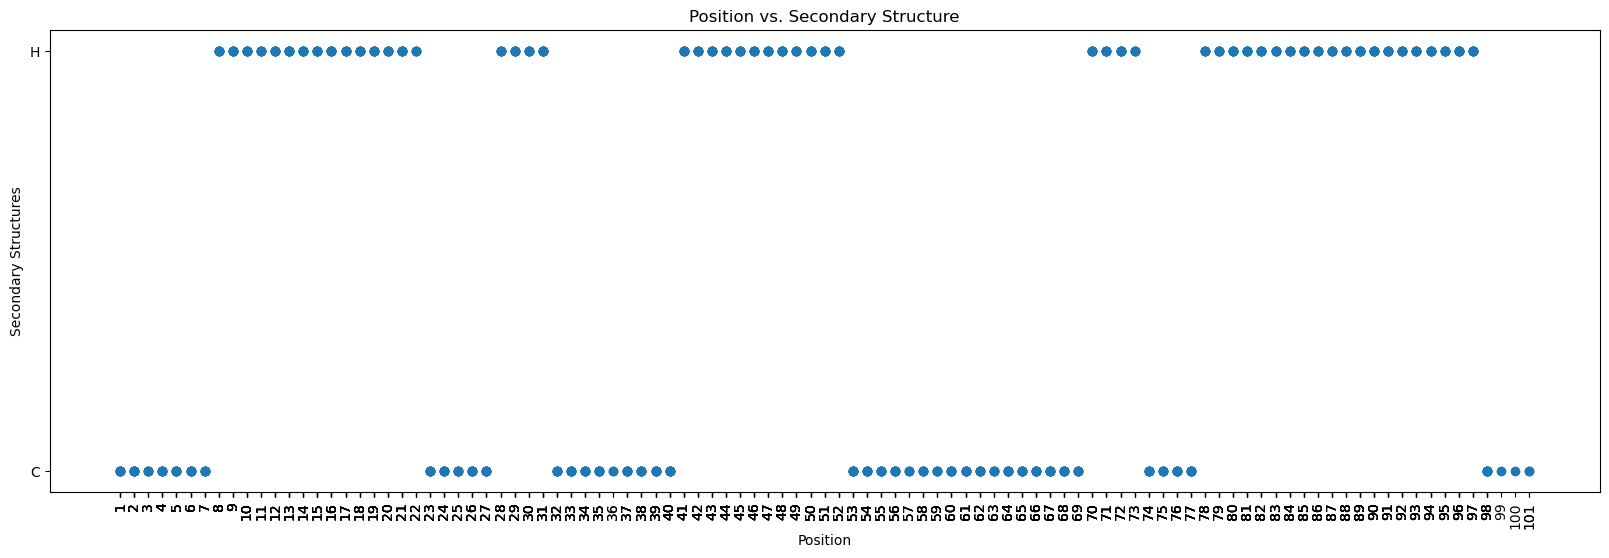

In [156]:
# Secondary Structures RING-Domaine

import matplotlib.pyplot as plt

# Extract the position and secondary structure columns
positions = new_RING['position']
structures = new_RING['secondary structures']

# Create a scatter plot
plt.scatter(positions, structures)

#Beschriftung genauer
plt.xticks(positions, rotation='vertical')


# Set labels and title
plt.xlabel('Position')
plt.ylabel('Secondary Structures')
plt.title('Position vs. Secondary Structure')


fig = plt.gcf()
fig.set_size_inches(20, 6)

# Show the plot
plt.show()


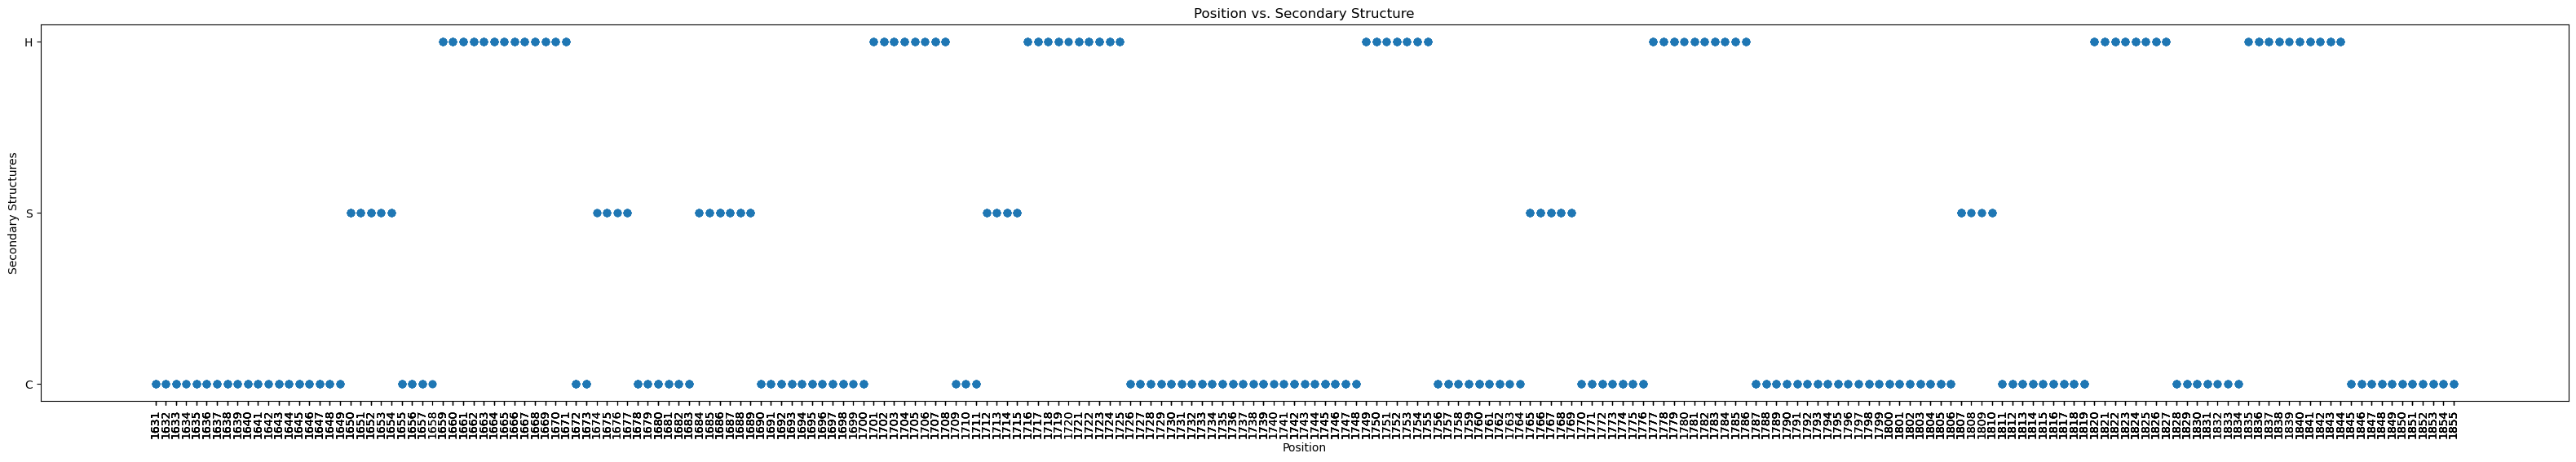

In [157]:
# Secondary Structures BRCT-Domaine

import matplotlib.pyplot as plt

# Extract the position and secondary structure columns
positions = new_BRCT['position']
structures = new_BRCT['secondary structures']

# Create a scatter plot
plt.scatter(positions, structures)

#Beschriftung genauer
plt.xticks(positions, rotation='vertical')


# Set labels and title
plt.xlabel('Position')
plt.ylabel('Secondary Structures')
plt.title('Position vs. Secondary Structure')


fig = plt.gcf()
fig.set_size_inches(40, 6)

# Show the plot
plt.show()


In [159]:
#RING und BRCT nur mit bin0 notinfinal
new_RING0 = new_RING[new_RING['DMS_score_bin'] == 0]
new_BRCT0 = new_BRCT[new_BRCT['DMS_score_bin'] == 0]

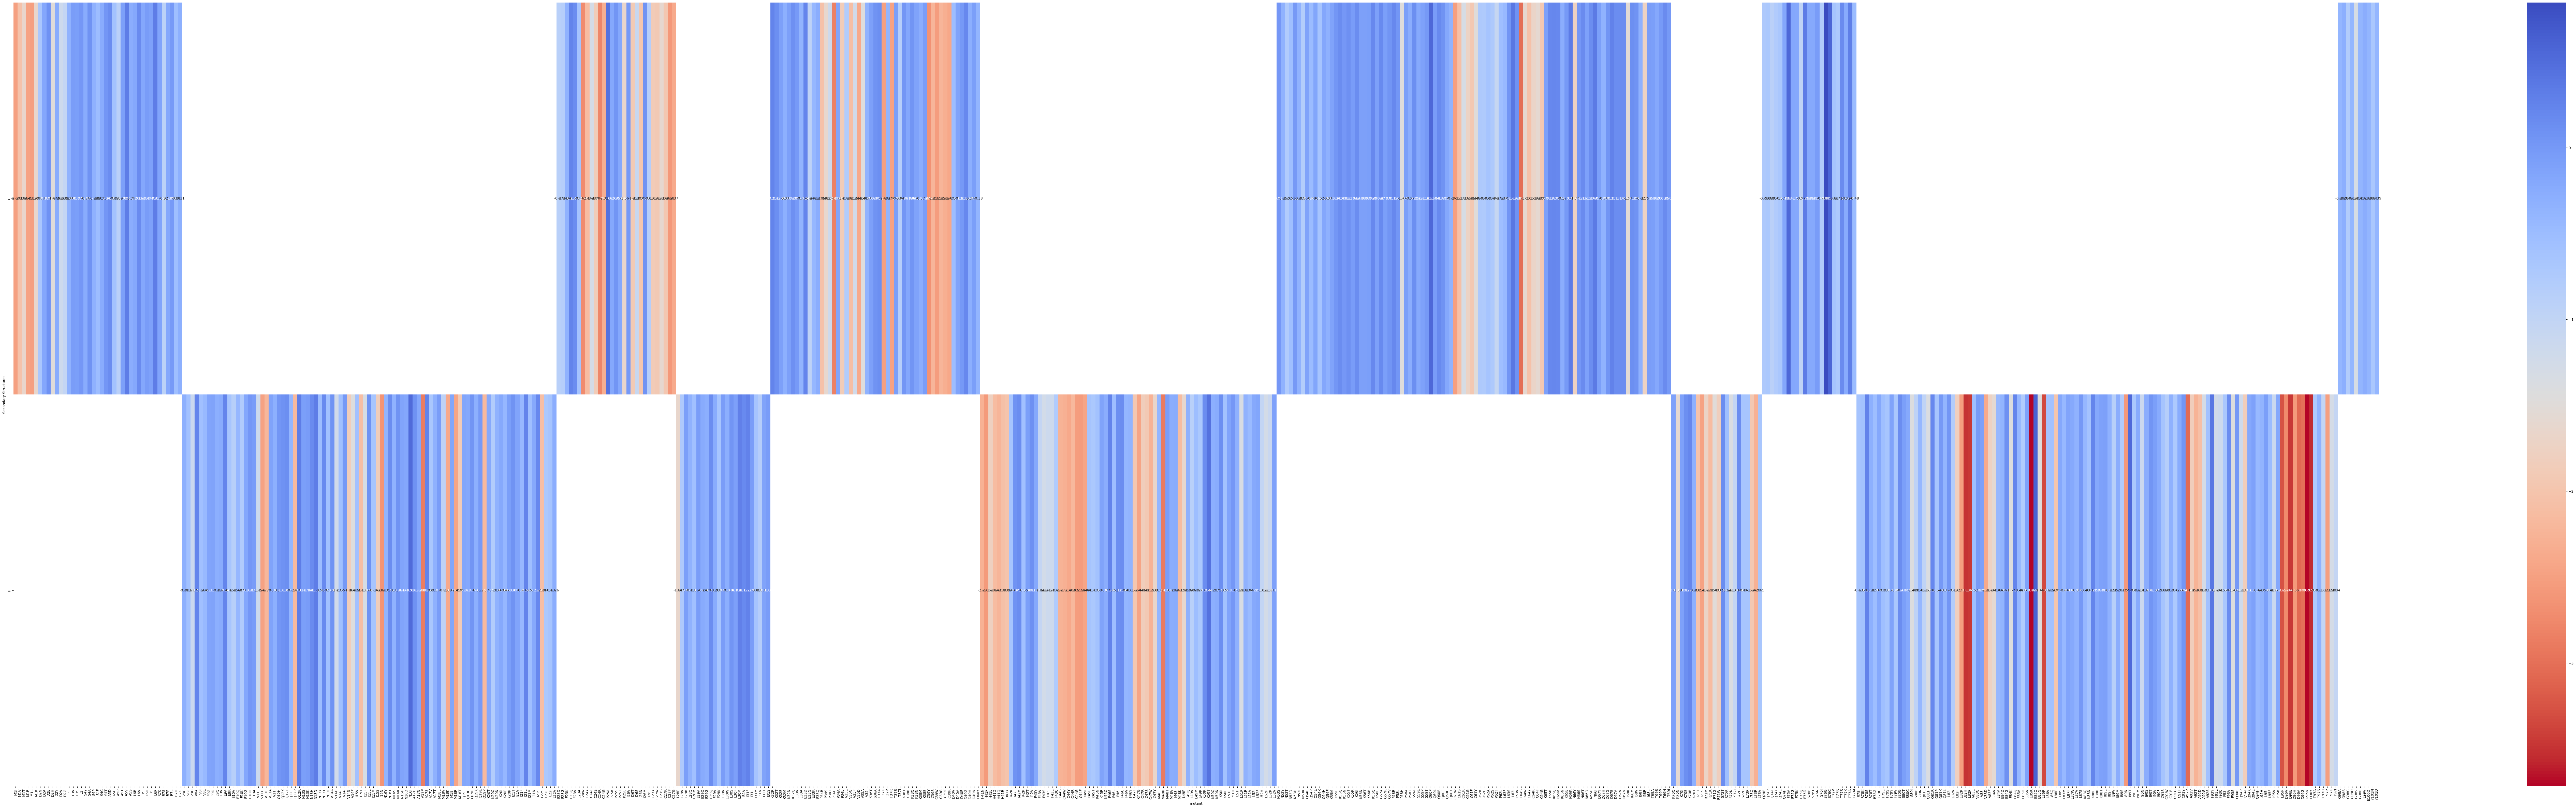

In [160]:
#Heatmap DMS_scores und secondary structure RING

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates or aggregate the data
new_RING_agg = new_RING.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order = new_RING['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_RING_agg = new_RING_agg.reindex(columns=mutant_order)

# Plot creation
plt.figure(figsize=(150, 40))  # Adjust the size of the plot

# Create the heatmap with a color scale
sns.heatmap(new_RING_agg, cmap="coolwarm_r", annot=True, fmt=".2f")

# Add axis labels
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")

# Display the plot
plt.show()



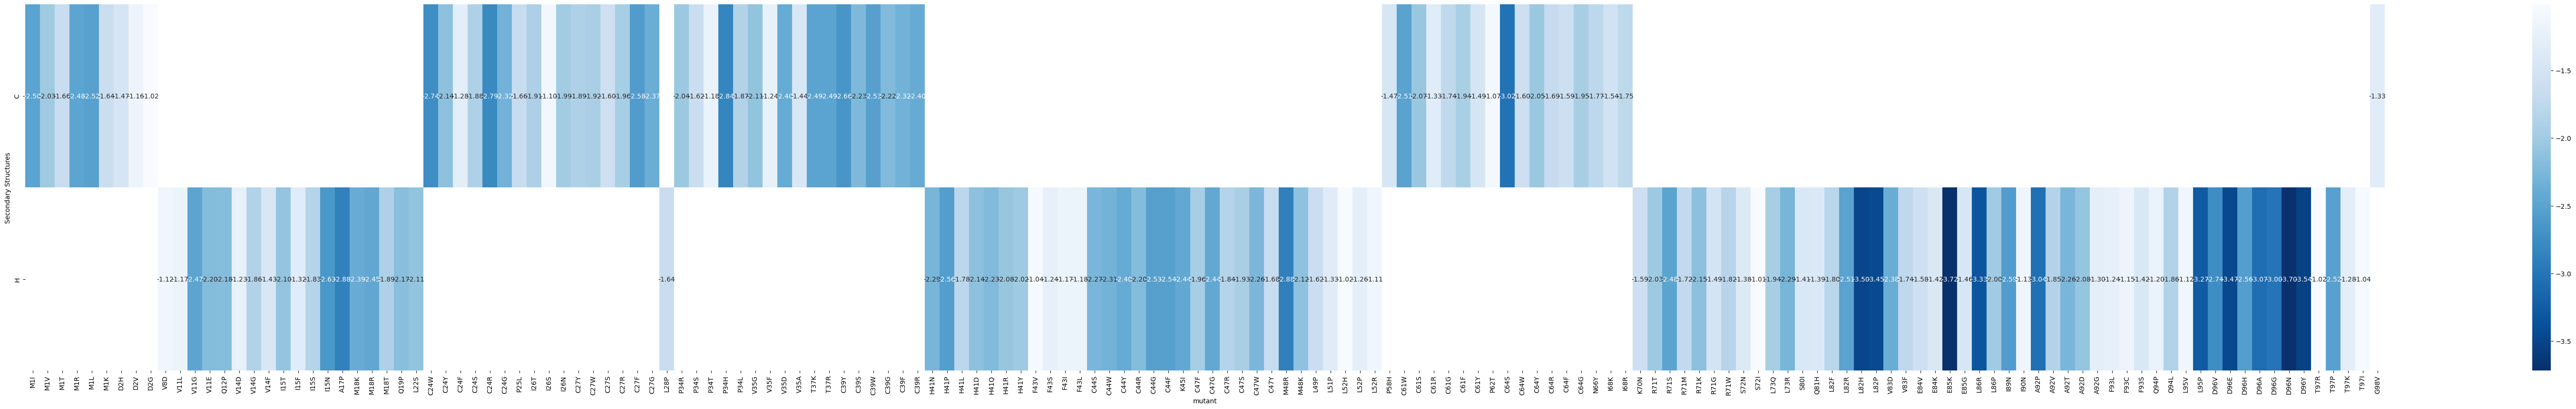

In [161]:
#Heatmap DMS_scores und secondary structure RING mit bin 0 notinfinal

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates or aggregate the data
new_RING_agg0 = new_RING0.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order0 = new_RING0['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_RING_agg0 = new_RING_agg0.reindex(columns=mutant_order0)

# Plot creation
plt.figure(figsize=(80, 10))  # Adjust the size of the plot

# Create the heatmap with a color scale
sns.heatmap(new_RING_agg0, cmap="Blues_r", annot=True, fmt=".2f")

# Add axis labels
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")

# Display the plot
plt.show()

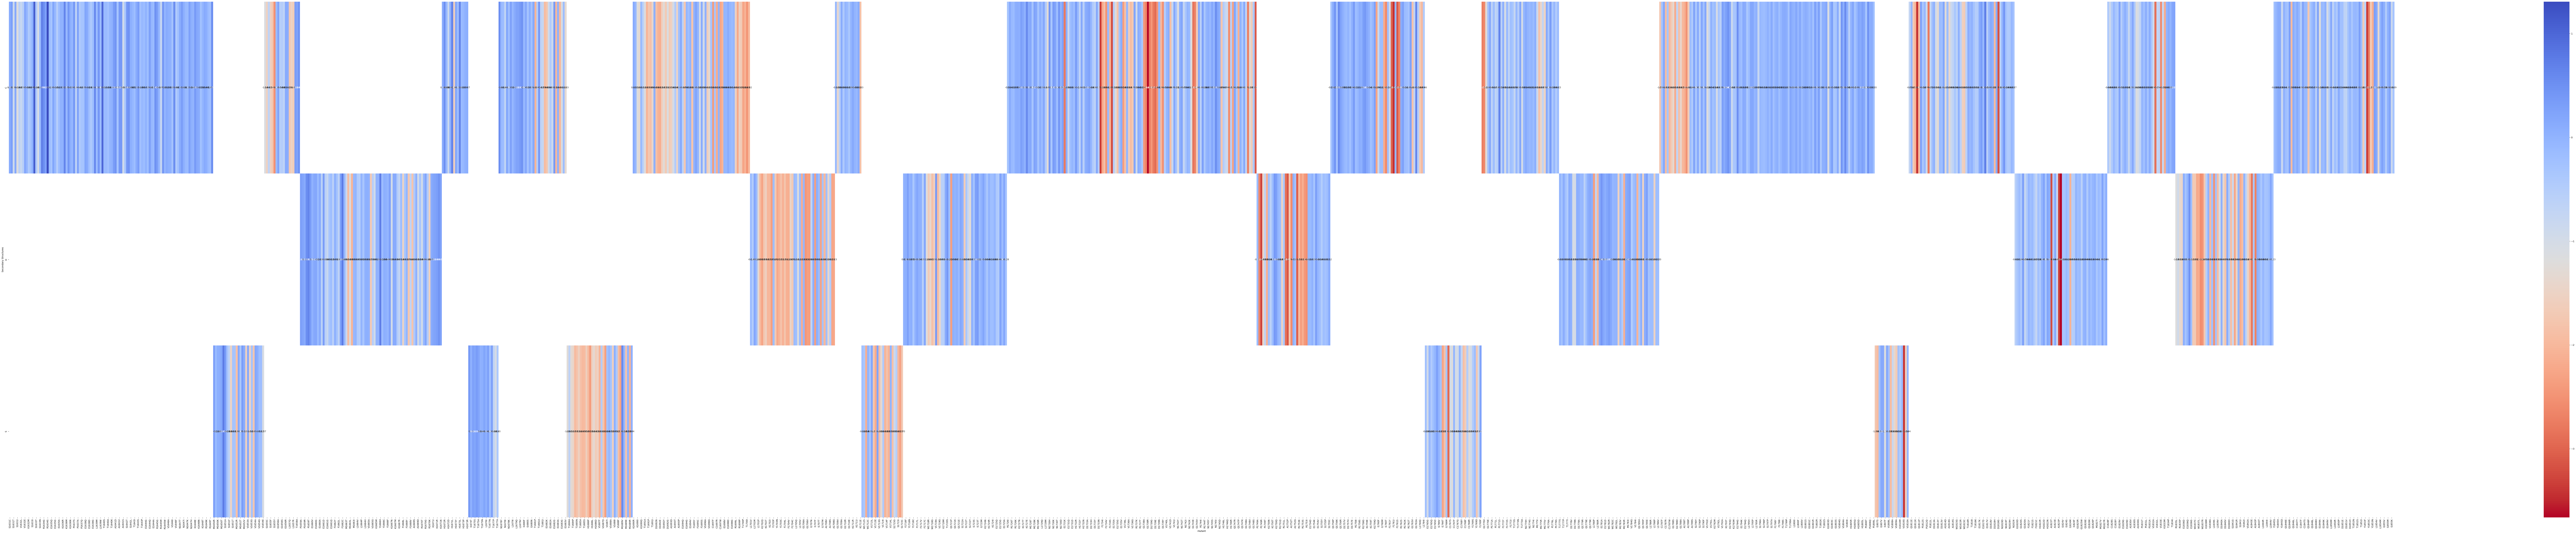

In [162]:
#Heatmap DMS_scores und secondary structure BRCT

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates or aggregate the data
new_BRCT_agg = new_BRCT.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order1 = new_BRCT['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_BRCT_agg = new_BRCT_agg.reindex(columns=mutant_order1)

# Plot creation
plt.figure(figsize=(230, 40))  # Adjust the size of the plot

# Create the heatmap with a color scale
sns.heatmap(new_BRCT_agg, cmap="coolwarm_r", annot=True, fmt=".2f")

# Add axis labels
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")

# Display the plot
plt.show()




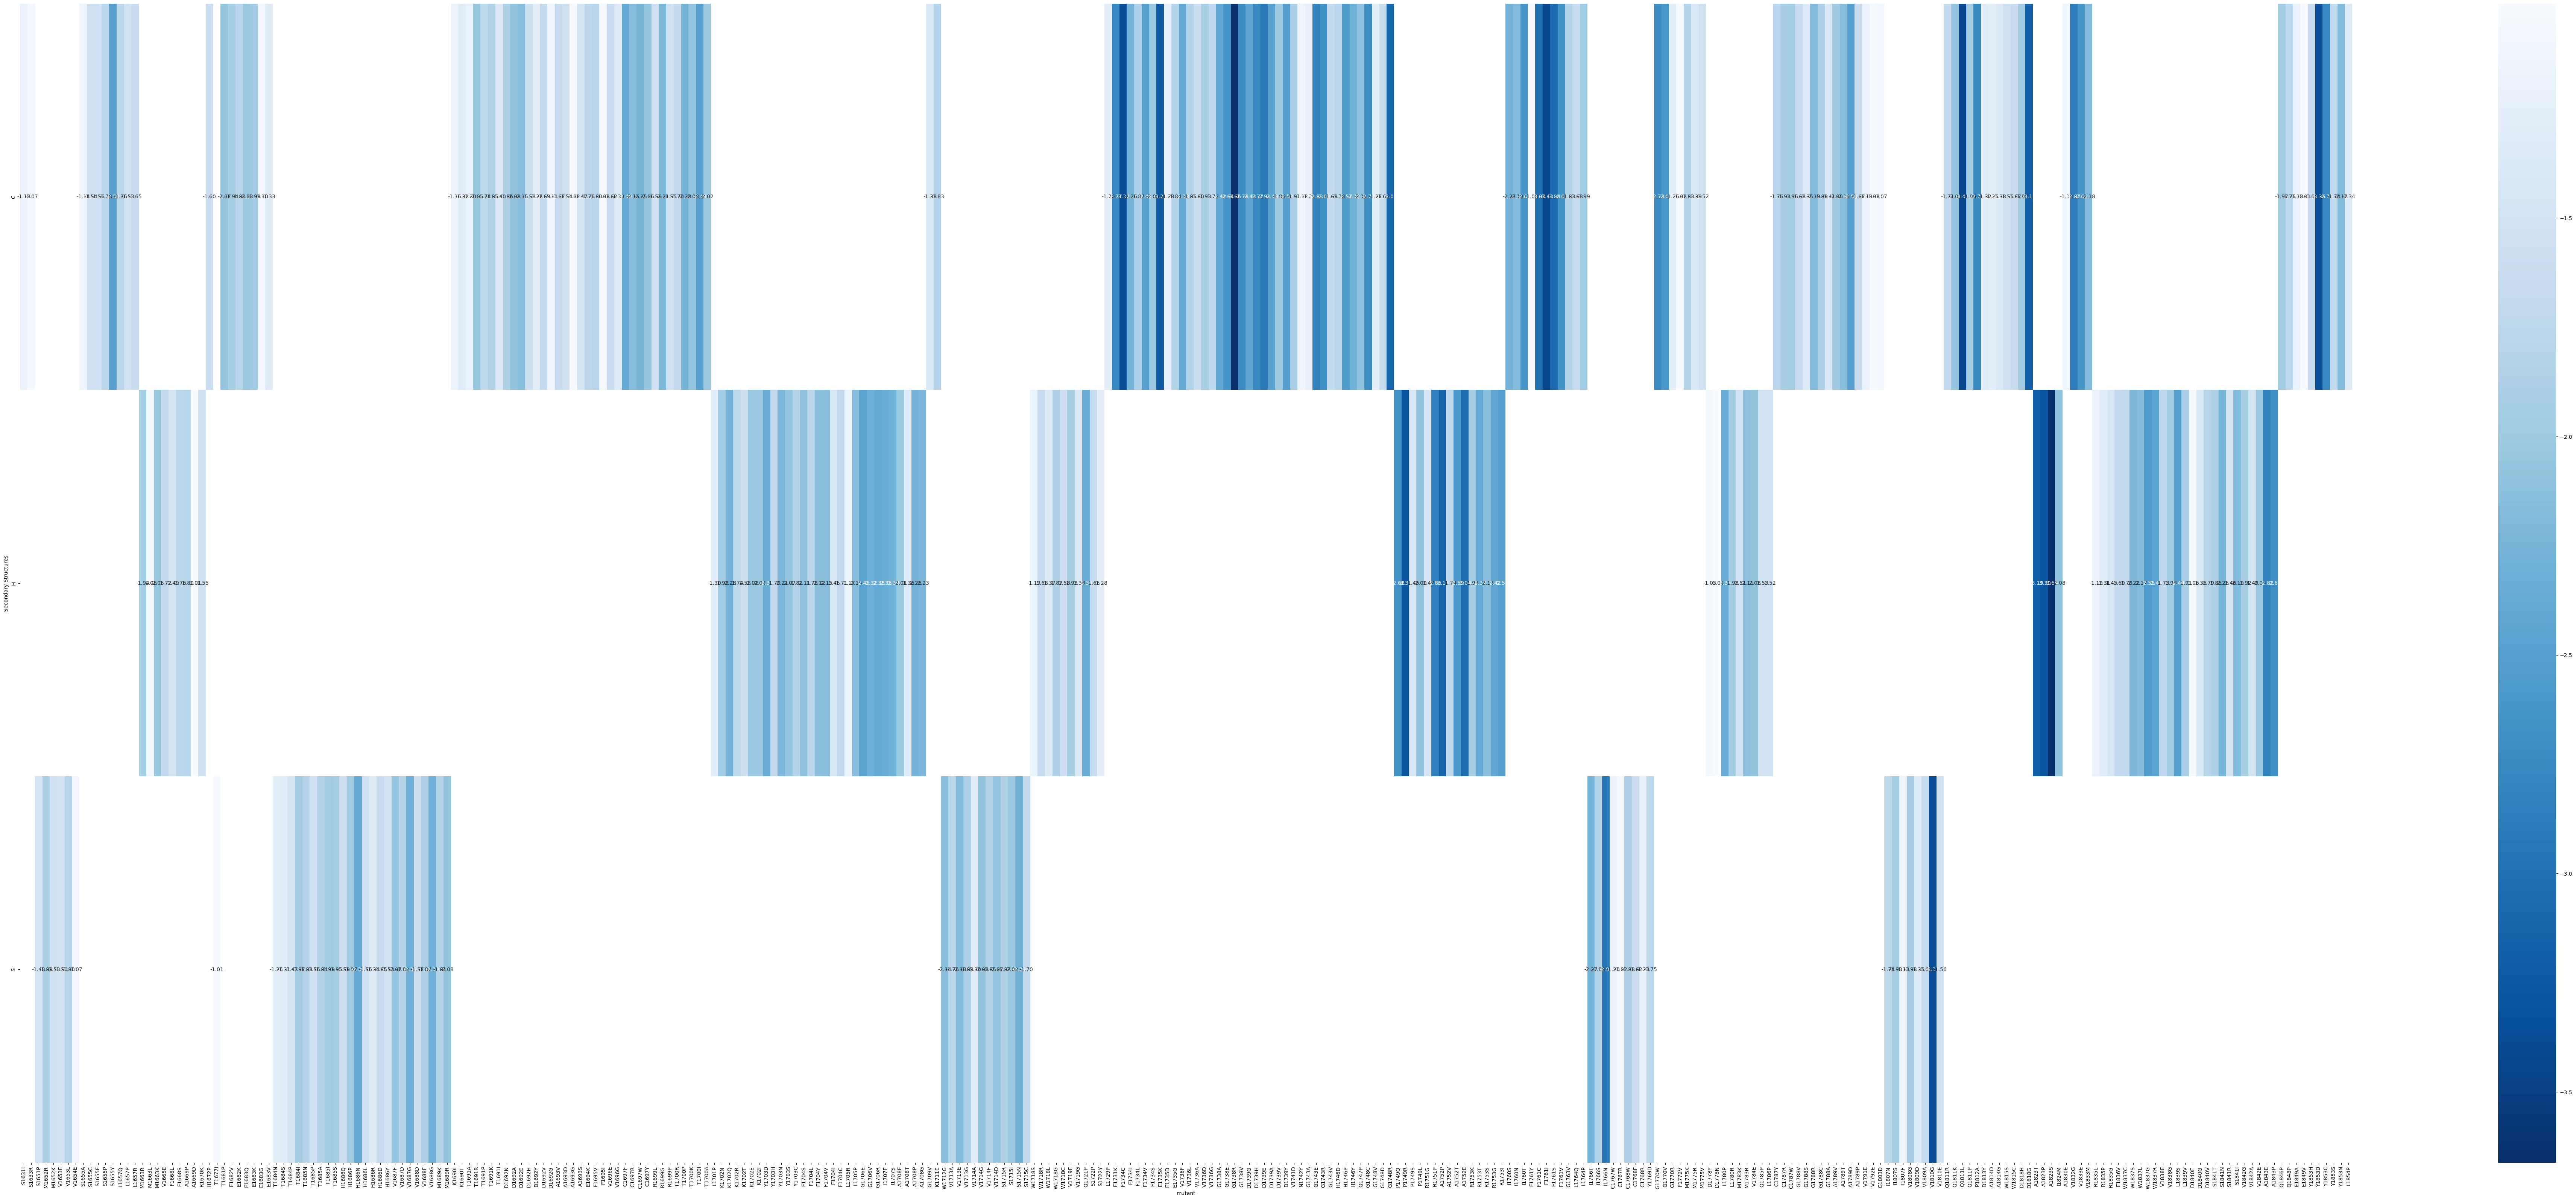

In [163]:
#Heatmap DMS_scores und secondary structure BRCT bin 0 notinfinal

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates or aggregate the data
new_BRCT_agg0 = new_BRCT0.pivot_table(index='secondary structures', columns='mutant', values='DMS_score')

# Get the order of mutants from the original DataFrame
mutant_order0 = new_BRCT0['mutant'].unique()

# Reindex the columns of the pivot table to match the desired order
new_BRCT_agg0 = new_BRCT_agg0.reindex(columns=mutant_order0)

# Plot creation
plt.figure(figsize=(100, 40))  # Adjust the size of the plot

# Create the heatmap with a color scale
sns.heatmap(new_BRCT_agg0, cmap="Blues_r", annot=True, fmt=".2f")

# Add axis labels
plt.xlabel("mutant")
plt.ylabel("Secondary Structures")

# Display the plot
plt.show()


In [164]:
#Buchstaben ist secondary structure: wollte jedes in Anführungszeichen notinfinal
string = "CCCCCCCHHHHHHHHHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHCCCCHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHHHCHHHHHHHCHHHHHHHHHCCCCCCCCCCCCCCCHHHHCCCCEECCCCCCCCCCCCCEEEEEECCCCCHHHHHHHHCCCCCCCCEEEECCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCEECCCCCCCCHHHCCCCCCCCCHHHCCCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCHHHHHCCCCCCCC"
quoted_string = ''.join(['"' + char + '"' for char in string])

print(quoted_string)


"C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""H""H""H""H""H""H""H""C""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""E""E""E""E""C""C""C""C""C""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""E""E""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""

In [165]:
#Vergleich der scores, der unterschiedlichen secondary-structure dataframes
DMS_score_sum_coils_df_bin0 = coils_df_bin0["DMS_score"].sum()
print("DMS_score_sum_coils_df_bin0:", DMS_score_sum_coils_df_bin0)

DMS_score_sum_helices_df_bin0 = helices_df_bin0["DMS_score"].sum()
print("DMS_score_sum_helices_df_bin0:", DMS_score_sum_helices_df_bin0)

DMS_score_sum_strands_df_bin0 = strands_df_bin0["DMS_score"].sum()
print("DMS_score_sum_strands_df_bin0:", DMS_score_sum_strands_df_bin0)

DMS_score_sum_coils_df_bin0: -459.665456887
DMS_score_sum_helices_df_bin0: -400.939786393
DMS_score_sum_strands_df_bin0: -106.910816591


In [166]:
Average_DMS_score_bin0_coils = DMS_score_sum_coils_df_bin0 / len(coils_df_bin0)
print('Average_DMS_score_bin0_coils: ', Average_DMS_score_bin0_coils)
Average_DMS_score_bin0_helices = DMS_score_sum_helices_df_bin0 / len(helices_df_bin0)
print('Average_DMS_score_bin0_helices: ', Average_DMS_score_bin0_helices)
Average_DMS_score_bin0_strands = DMS_score_sum_strands_df_bin0 / len(strands_df_bin0)
print('Average_DMS_score_bin0_strands: ', Average_DMS_score_bin0_strands)

Average_DMS_score_bin0_coils:  -1.9560232207957446
Average_DMS_score_bin0_helices:  -1.9947253054378111
Average_DMS_score_bin0_strands:  -1.7818469431833333
